# Predictive Models
This notebook is to examine the performance of various models using a Google Cloud virtual machine with 16 CPUs and 30 GB memory. For model exploration, refer to the model's notebook within the [notebooks](notebooks) folder. The models are in the following order:

1. **Logistic Regression**
    * Random Under-sampling
    * SVM-SMOTE (Synthetic Minority Over-sampling Technique)
1. **Random Forest**
    * Random Under-sampling
    * TF-IDF and Random Under-sampling
1. **Support Vector Machine**
    * Random Under-sampling
1. **Word2Vec**
    * Latent Dirichlet Allocation (LDA), Logistic Regression
    * Logistic Regression and Random Under-sampling
    * LDA, Logistic Regression, and Random Under-sampling

In [1]:
# import libraries
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
# define project root directory
PROJ_ROOT = os.path.join(os.pardir)

# define source directory
src_dir = os.path.join('src')
sys.path.append(src_dir)

In [3]:
# import project modules
from features.build_features import clean_and_tokenize
from visualization.visualize import plot_confusion_matrix, draw_roc_curve
from models.train_model import *

In [4]:
%load_ext watermark
%watermark -a "E. Chris Lynch" -d -t -v -p numpy,pandas,matplotlib,gensim,nltk,sklearn,imblearn

E. Chris Lynch 2019-02-25 20:39:52 

CPython 3.7.2
IPython 7.2.0

numpy 1.15.4
pandas 0.23.4
matplotlib 3.0.2
gensim 3.7.1
nltk 3.4
sklearn 0.20.2
imblearn 0.4.3


In [5]:
# locate CSV file
data_file =  'data/processed/clinic_train_data.csv'

# split into train and test sets
X_train, X_test, y_train, y_test = load_and_split_df(data_file)

## Logistic Regression
### Random Under-sampling

In [6]:
# define Count Vectorizer parameters
vec_params = {'max_features': 3000, 'tokenizer': clean_and_tokenize, 'stop_words': 'english'}

# define logistic regression parameters
lr_params = {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs', 'random_state': 42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = logistic_regression(vec_params=vec_params, lr_params=lr_params, 
                                                         train_feat=X_train, train_label=y_train,
                                                         test_feat=X_test, test_label=y_test,
                                                         model='rus')

Confusion matrix, without normalization
[[7942 3155]
 [ 304  407]]


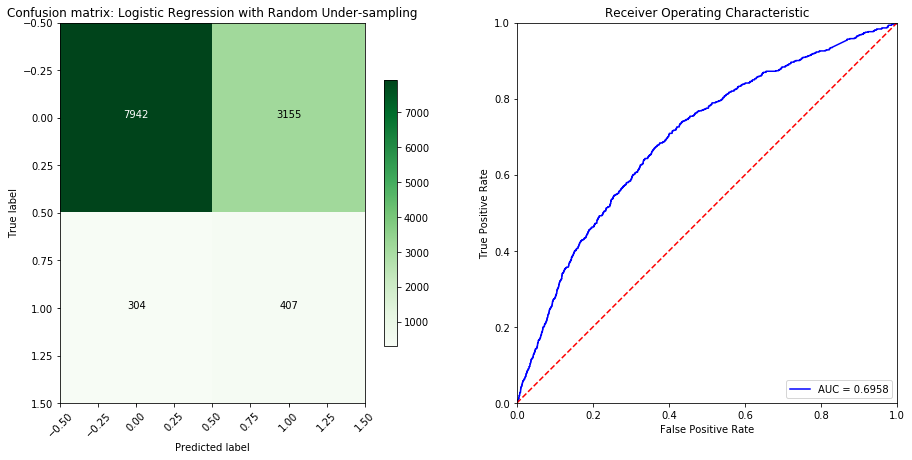

In [7]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Logistic Regression with Random Under-sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)
    
plt.show()

### SVM-SMOTE

In [8]:
# define logistic regression parameters
lr_params = {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 700, 'random_state': 42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = logistic_regression(vec_params=vec_params, lr_params=lr_params, 
                                                         train_feat=X_train, train_label=y_train,
                                                         test_feat=X_test, test_label=y_test,
                                                         model='svmsmote')

Confusion matrix, without normalization
[[10630   467]
 [  625    86]]


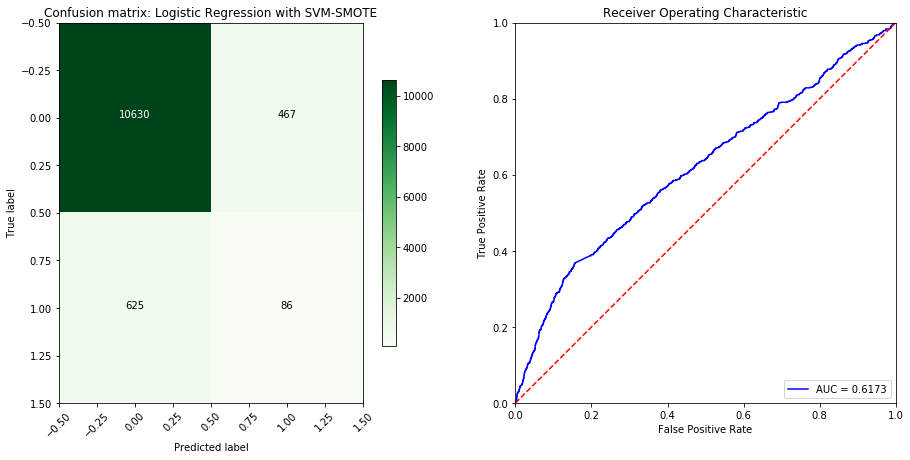

In [9]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Logistic Regression with SVM-SMOTE', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)
    
plt.show()

## Random Forest
### Random Under-sampling

In [10]:
# define logistic regression parameters
rf_params = {'n_estimators':500, 'max_depth':25, 'random_state':42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = random_forest_undersampler(vec_params=vec_params, rf_params=rf_params,
                                                                train_feat=X_train, train_label=y_train,
                                                                test_feat=X_test, test_label=y_test)

Confusion matrix, without normalization
[[6818 4279]
 [ 208  503]]


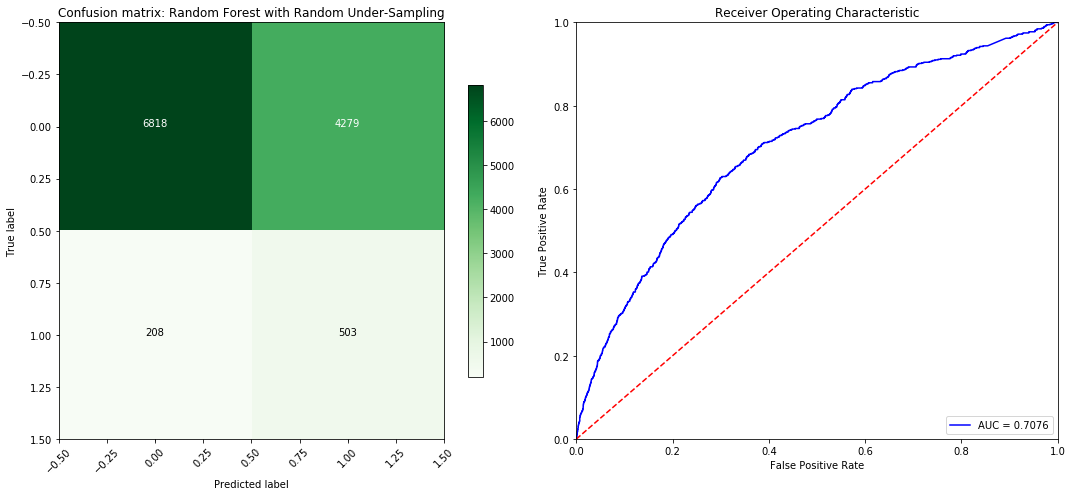

In [11]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Random Forest with Random Under-Sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)

plt.tight_layout()
plt.show()

### TF-IDF and Random Under-sampling

In [12]:
# define logistic regression parameters
rf_params = {'n_estimators':500, 'max_depth':25, 'random_state':42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = random_forest_undersampler(vec_params=vec_params, rf_params=rf_params,
                                                                train_feat=X_train, train_label=y_train,
                                                                test_feat=X_test, test_label=y_test, tfidf=True)

Confusion matrix, without normalization
[[7162 3935]
 [ 228  483]]


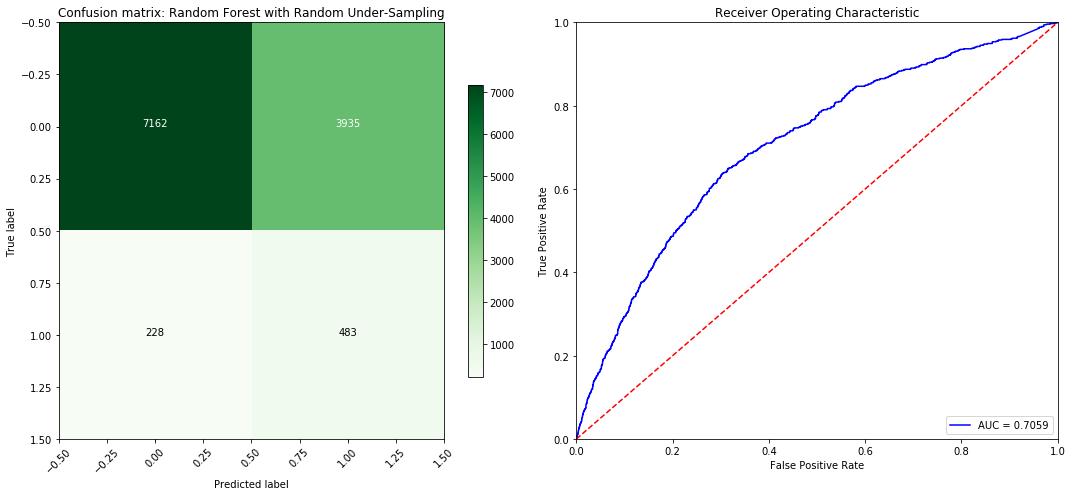

In [13]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Random Forest with Random Under-Sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)

plt.tight_layout()
plt.show()

## Support Vector Machine

In [14]:
# define SVM parameters
svm_params = {'C':1.0, 'gamma':'scale', 'probability':True, 'random_state':42}

# train and fit SVM model
pipe_svm, pipe_fit_svm, y_pred_svm, cnf_matrix_svm = svm_text_classification(vec_params=vec_params, svm_params=svm_params,
                                                                             train_feat=X_train, train_label=y_train,
                                                                             test_feat=X_test, test_label=y_test)

Confusion matrix, without normalization
[[7400 3697]
 [ 256  455]]


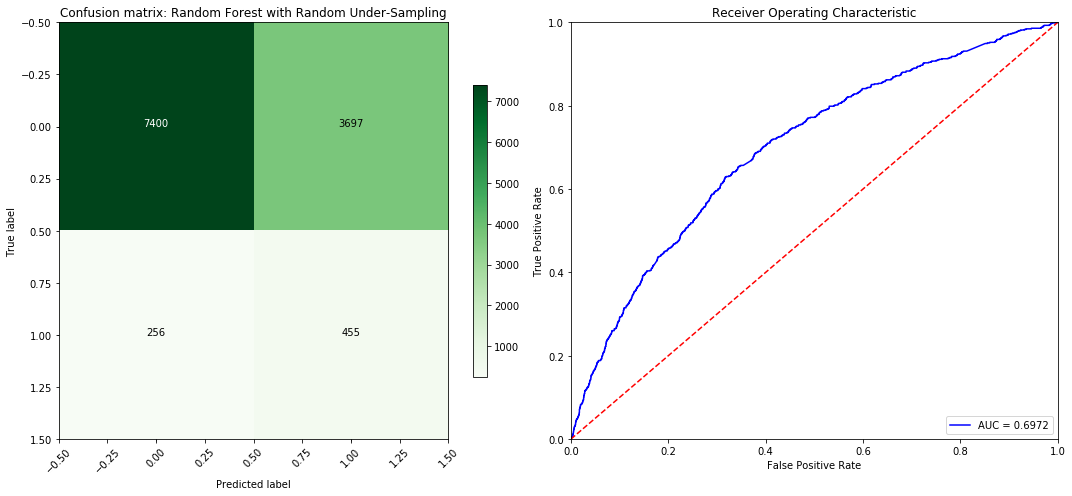

In [15]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_svm, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Random Forest with Random Under-Sampling', 
                      cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe_svm, features=X_test, target=y_test, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()

## Word2Vec
### Latent Dirichlet Allocation

In [17]:
df_train = pd.DataFrame({'text':X_train, 'label':y_train})
df_test = pd.DataFrame({'text':X_test, 'label':y_test})

In [18]:
%%time
# create LDA features
lda_model(df_train, max_pct=0.8, min_docs=3, num_topics=150, workers=15)
lda_model(df_test, max_pct=0.8, min_docs=3, num_topics=150, workers=15)

CPU times: user 2h 39min 41s, sys: 2min 28s, total: 2h 42min 10s
Wall time: 1h 41min 5s


In [44]:
%%time
# set Word2Vec hyper-parameters
w2v_params = {'sg':1, 'hs':0, 'num_workers':15, 'num_features':200, 'min_word_count':3, 
              'context':6, 'downsampling':1e-3, 'negative':5, 'iter':6}

# extract Word2Vec features
w2v_model(df_train, **w2v_params)
w2v_model(df_test, **w2v_params)

CPU times: user 3h 19min 12s, sys: 20.3 s, total: 3h 19min 32s
Wall time: 1h 12min 40s


In [45]:
# transform LDA and Word2Vec features
X_train_lda = np.array(list(map(np.array, df_train.lda_features)))
X_train_w2v = np.array(list(map(np.array, df_train.w2v_features)))

X_test_lda = np.array(list(map(np.array, df_test.lda_features)))
X_test_w2v = np.array(list(map(np.array, df_test.w2v_features)))

In [46]:
# append Word2Vec and LDA features
combined_features_train = np.append(X_train_lda, X_train_w2v, axis=1)
combined_features_test = np.append(X_test_lda, X_test_w2v, axis=1)

In [83]:
# transform the arrays
X_train_lda = np.array(list(map(np.array, lda_features_train)))
X_train_w2v = np.array(list(map(np.array, w2v_features_train)))

X_test_lda = np.array(list(map(np.array, lda_features_test)))
X_test_w2v = np.array(list(map(np.array, w2v_features_test)))

In [53]:
# train and fit Word2Vec model with LDA and Logistic Regression
lr_params = {'solver':'liblinear', 'penalty': 'l2', 'random_state':0}

clf_lda, clf_fit_lda, y_pred_lda, cnf_matrix_lda = word2vec_logistic_regression(train_feat=combined_features_train, train_label=y_train, 
                                                                                model='w2v_lda', test_feat=combined_features_test, 
                                                                                test_label=y_test, lr_params=lr_params)

Confusion matrix, without normalization
[[11055    42]
 [  709     2]]


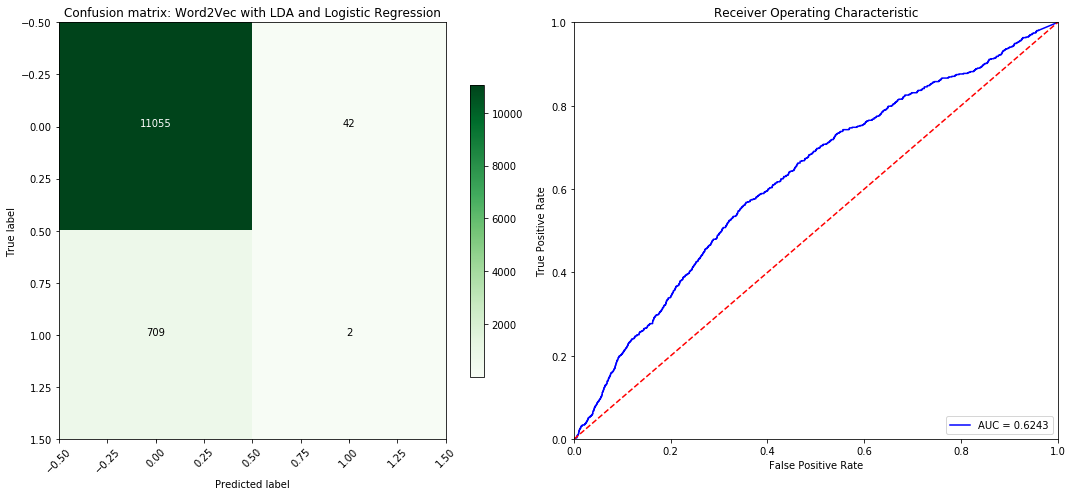

In [54]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_lda, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Word2Vec with LDA and Logistic Regression', 
                      cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=clf_lda, features=combined_features_test, target=y_test, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()

### LDA and Random Under-Sampling

In [59]:
# undersample majority class
df_train_undersampled = random_undersample(df_train)
df_test_undersampled = random_undersample(df_test)

# extract and combine features
X_train_lda_rus = np.array(list(map(np.array, df_train_undersampled.lda_features)))
X_train_w2v_rus = np.array(list(map(np.array, df_train_undersampled.w2v_features)))
X_train_combined_rus = np.append(X_train_lda_rus, X_train_w2v_rus, axis=1)

X_test_lda_rus = np.array(list(map(np.array, df_test_undersampled.lda_features)))
X_test_w2v_rus = np.array(list(map(np.array, df_test_undersampled.w2v_features)))
X_test_combined_rus = np.append(X_test_lda_rus, X_test_w2v_rus, axis=1)

In [56]:
# train and fit Word2Vec and LDA model with undersampled majority class
clf_lda_rus, clf_fit_lda_rus, y_pred_lda_rus, cnf_matrix_lda_rus = word2vec_logistic_regression(train_feat=X_train_combined_rus, train_label=df_train_undersampled.label,
                                                                                                model='w2v_lda', test_feat=X_test_combined_rus, 
                                                                                                test_label=df_test_undersampled.label, lr_params=lr_params)

Confusion matrix, without normalization
[[190 521]
 [108 603]]


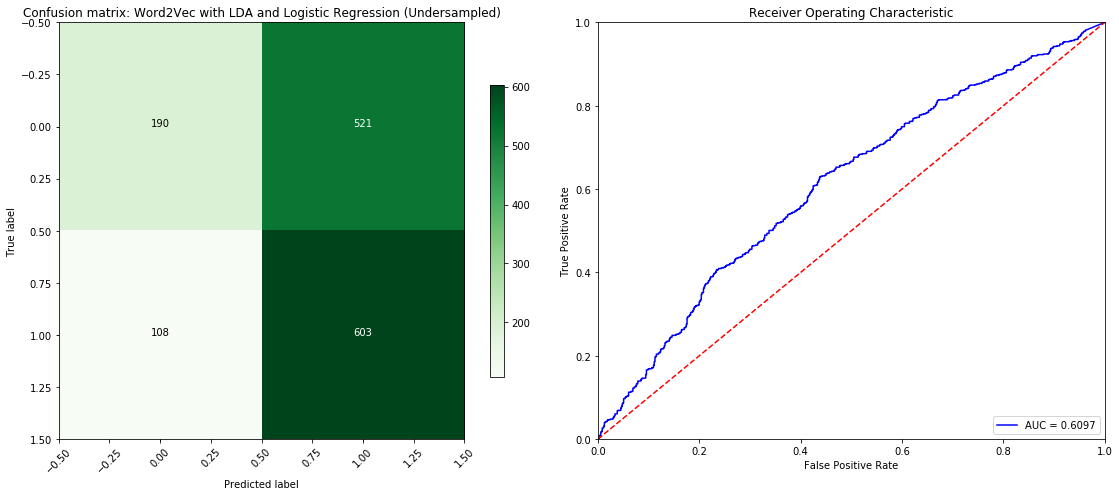

In [58]:
plt.figure(figsize=(16, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_lda_rus, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Word2Vec with LDA and Logistic Regression (Undersampled)', 
                      cmap=plt.cm.Greens, ax=ax1)

# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=clf_lda_rus, features=X_test_combined_rus, target=df_test_undersampled.label, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()

### Random Under-Sampling

In [60]:
# train and fit Word2Vec and LDA model with undersampled majority class
clf_rus, clf_fit_rus, y_pred_rus, cnf_matrix_rus = word2vec_logistic_regression(train_feat=X_train_w2v_rus, train_label=df_train_undersampled.label,
                                                                                model='w2v_lda', test_feat=X_test_w2v_rus,
                                                                                test_label=df_test_undersampled.label, lr_params=lr_params)

Confusion matrix, without normalization
[[ 40 671]
 [ 21 690]]


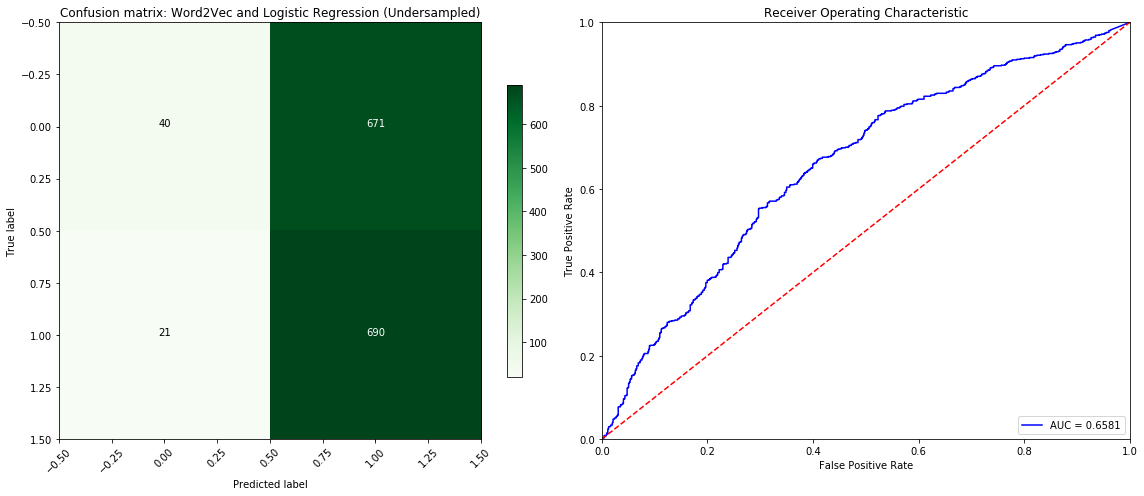

In [62]:
plt.figure(figsize=(16, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_rus, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Word2Vec and Logistic Regression (Undersampled)', 
                      cmap=plt.cm.Greens, ax=ax1)

# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=clf_rus, features=X_test_w2v_rus, target=df_test_undersampled.label, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()